Assignment Title: Develop a Face Recognition System

Objective:

Build a face recognition system using convolutional neural networks (CNNs).
Understand the ethical implications of face recognition technologies.
Assignment Instructions:

Dataset:
Use a custom or public face dataset (e.g., LFW dataset) for training the model.
Model Implementation:
Develop a CNN-based face recognition system using the OpenCV library and TensorFlow/Keras.
Train the model to recognize faces from the dataset, and evaluate its performance.
Ethics Discussion:
Write a section in the report discussing the ethical considerations of face recognition technology, including issues of privacy, bias, and fairness.

## Import Libraries and Load Subset of Data
- Starting with subset of 15 people to experiment
- Whole Dataset is too heavy and difficult to proccess

In [ ]:
import deeplake
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter, defaultdict


# Load a small subset of the LFW dataset
ds = deeplake.load('hub://activeloop/lfw-deep-funneled')

# Print data attributes
name = ds.name[0]  # Get first name
print("Raw name tensor:", name)
print("Name data:", name.data())  

# Show the available fields
print("\nAvailable fields:")
for field in ds.tensors:
    print(f"- {field}")

X = []  # Images
y = []  # Names

# Count occurrences per person
all_counts = Counter(ds.name[i].data()['text'][0] for i in range(len(ds)))

# Select people with at least 5 images
eligible_people = {name for name, count in all_counts.items() if count >= 5}

person_counts = defaultdict(int)
selected_people = set()

for i in range(len(ds)):
    name_val = ds.name[i].data()['text'][0]
    
    if name_val not in eligible_people:
        continue

    if len(selected_people) < 15:
        selected_people.add(name_val)

    if name_val in selected_people and person_counts[name_val] < 5:
        image = ds.images[i].numpy()
        image = tf.image.resize(image, (64, 64)) / 255.0  # Resize & normalize
        
        X.append(image)
        y.append(name_val)
        person_counts[name_val] += 1

    if len(selected_people) == 15 and all(count == 5 for count in person_counts.values()):
        break

print("Selected people:", list(selected_people))



/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lfw-deep-funneled



|

hub://activeloop/lfw-deep-funneled loaded successfully.



Raw name tensor: Tensor(key='name', index=Index([0]))
Name data: {'value': array([0], dtype=uint32), 'text': ['Sergio_Vieira_De_Mello']}

Available fields:
- images
- name


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deeplake/core/tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


Selected people: ['Princess_Caroline', 'Sergio_Vieira_De_Mello', 'Nicole_Kidman', 'Queen_Rania', 'Christine_Baumgartner', 'Mariah_Carey', 'Sarah_Hughes', 'David_Nalbandian', 'Steffi_Graf', 'Jon_Gruden', 'Robert_Duvall', 'Nancy_Pelosi', 'Sylvester_Stallone', 'Fidel_Castro', 'Lindsay_Davenport']


## Pre Process Data

X shape: (75, 64, 64, 3)
y shape: (75,)
First person: Sergio_Vieira_De_Mello
First person encoded: 12


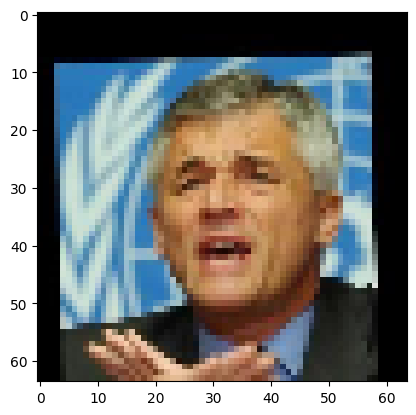

In [37]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Print dataset shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display first person and name
print("First person:", y[0])
print("First person encoded:", y_encoded[0])
plt.imshow(X[1])
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Define & Train the Model

In [ ]:
# Build the model